In [1]:
from urllib.request import urlopen
import json

html = urlopen("http://api.open-notify.org/iss-now.json").read()
print(html)

b'{"timestamp": 1657810396, "iss_position": {"latitude": "-2.0443", "longitude": "-133.4351"}, "message": "success"}'


In [2]:
import pandas as pd 
import numpy as np
import requests

In [3]:
def get_space_station_location():
    r = requests.get(url="http://api.open-notify.org/iss-now.json")
    space_station_location = (r.json())
    
    space_station_longitude = float(space_station_location["iss_position"]["longitude"])
    print('space_station_longitude', space_station_longitude)
    
    space_station_latitude = float(space_station_location["iss_position"]["latitude"])
    print('space_station_latitude', space_station_latitude)
    
    return(space_station_longitude, space_station_latitude)

In [4]:
pip install Basemap

Note: you may need to restart the kernel to use updated packages.


In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
get_space_station_location()

space_station_longitude -133.3092
space_station_latitude -2.2217


(-133.3092, -2.2217)

space_station_longitude -133.2732
space_station_latitude -2.2723


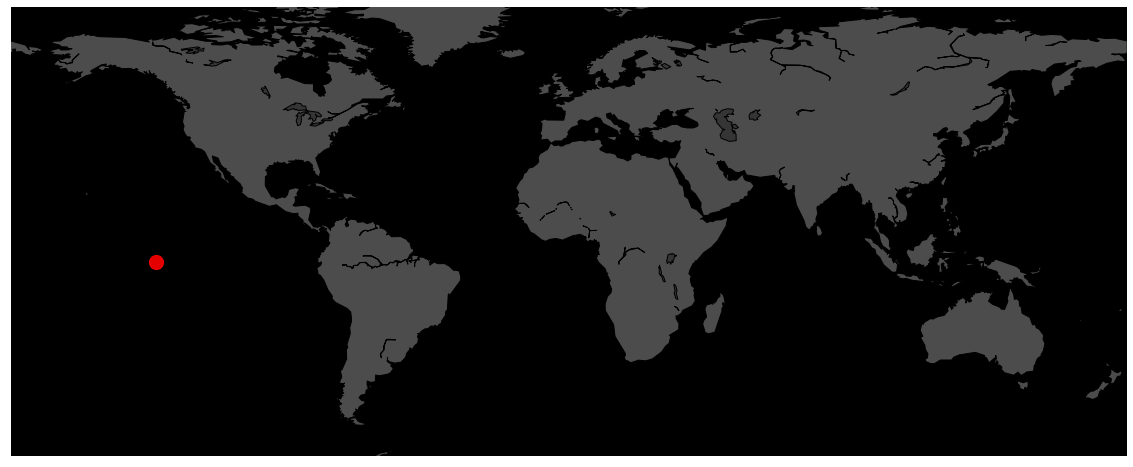

In [7]:
plt.figure(figsize = (20, 14))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="black", linewidth=0)
m.fillcontinents(color="white", alpha=0.3)
m.drawcoastlines(linewidth=1, color="black")

space_station_longitude, space_station_latitude = get_space_station_location()
m.scatter(space_station_longitude, space_station_latitude, s=200, alpha=0.9, color="red")

In [8]:
record_data = True
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
    
    import time
    starttime = time.time()
    
    space_station_data = []
    while True:
        r = requests.get(url="http://api.open-notify.org/iss-now.json")
        space_station_location = (r.json())
        print(space_station_location)
        
        space_station_data.append([space_station_location["timestamp"],
                                   space_station_location["iss_position"]["latitude"],
                                   space_station_location["iss_position"]["longitude"]])
        
        tmp_space_station_df = pd.DataFrame(space_station_data, columns = ["timestamp", "latitude", "longitude"])
        tmp_space_station_df.to_csv("ISS_location_" + date_to_print + ".csv", index=None)
        
        if len(space_station_data) == 100:
            break
        
        time.sleep(10.0 - ((time.time() - starttime) % 10.0))

{'timestamp': 1657810401, 'iss_position': {'latitude': '-2.2976', 'longitude': '-133.2553'}, 'message': 'success'}
{'timestamp': 1657810411, 'iss_position': {'latitude': '-2.8044', 'longitude': '-132.8953'}, 'message': 'success'}
{'timestamp': 1657810421, 'iss_position': {'latitude': '-3.3110', 'longitude': '-132.5351'}, 'message': 'success'}
{'timestamp': 1657810431, 'iss_position': {'latitude': '-3.8173', 'longitude': '-132.1744'}, 'message': 'success'}
{'timestamp': 1657810441, 'iss_position': {'latitude': '-4.3235', 'longitude': '-131.8133'}, 'message': 'success'}
{'timestamp': 1657810451, 'iss_position': {'latitude': '-4.8295', 'longitude': '-131.4516'}, 'message': 'success'}
{'timestamp': 1657810461, 'iss_position': {'latitude': '-5.3353', 'longitude': '-131.0892'}, 'message': 'success'}
{'timestamp': 1657810471, 'iss_position': {'latitude': '-5.8407', 'longitude': '-130.7263'}, 'message': 'success'}
{'timestamp': 1657810481, 'iss_position': {'latitude': '-6.3459', 'longitude': '

In [9]:
iss_flight_record = pd.read_csv("ISS_location_20220714225322.csv")

from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record["timestamp"]]
iss_flight_record["date"] = date_time
             
iss_flight_record["index"] = range(1, len(iss_flight_record)+1)

iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1657810401,-2.2976,-133.2553,2022-07-14 22:53:21,1
1,1657810411,-2.8044,-132.8953,2022-07-14 22:53:31,2
2,1657810421,-3.3110,-132.5351,2022-07-14 22:53:41,3
3,1657810431,-3.8173,-132.1744,2022-07-14 22:53:51,4
4,1657810441,-4.3235,-131.8133,2022-07-14 22:54:01,5


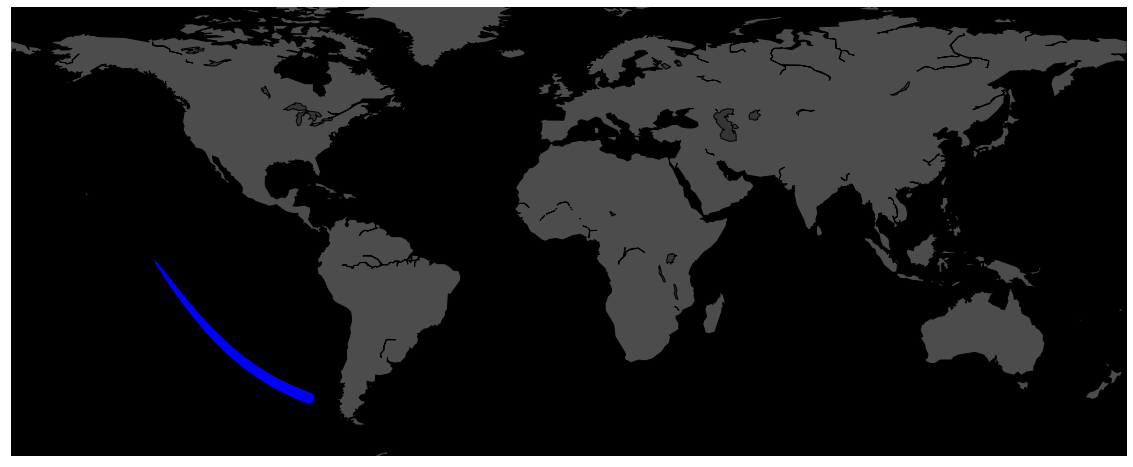

In [10]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize = (20, 14))

m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawmapboundary(fill_color="black", linewidth=0)
m.fillcontinents(color="white", alpha=0.3)
m.drawcoastlines(linewidth=1, color="black")

m.scatter(iss_flight_record["longitude"],
          iss_flight_record["latitude"],
          s=iss_flight_record["index"], alpha=1.0, color="blue")